## import

In [2]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import IPython.display as ipd
import sys
import wave
import csv
import os

## get_audio_name

In [3]:
f = csv.reader(open('./sample_list.csv','r',encoding='utf-8'))

audio_list = []

for audio_name, _ in f:
    if audio_name == 'audio':
        continue
    else:
        audio_name, _ = audio_name.split('.')
        audio_list.append(audio_name)

### def vadplotgraph(filepath, filename)

: plot graphs of audio and truncated audio

before truncated KaiSpeech_000002.pcm : 10.59 s
after truncated KaiSpeech_000002.pcm : 7.264 s
Result: shorten 3.326 s


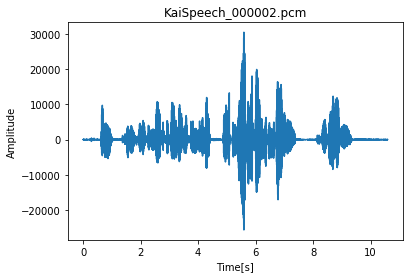

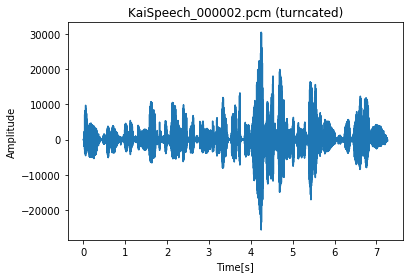

In [30]:
def vadplotgraph(filepath,filename, mode = 'on'):
    # read pcm
    pcm = np.memmap(filepath+filename, dtype='h', mode='r')
    audio = np.array([float(x) for x in pcm])
    
    # make truncated pcm
    non_silence_ids = librosa.effects.split(y=audio, top_db=30)
    truncated = np.concatenate([audio[start:end] for start, end in non_silence_ids])
    
    # x-axis: time, y-axis: amplitude (use linspace to plot)
    audio_time = np.linspace(0, len(audio)/16000,len(audio))
    truncated_time = np.linspace(0,len(truncated)/16000, len(truncated))
    
    if(mode == 'on'):
        # original audio plot
        _, g_audio = plt.subplots()
        g_audio.plot(audio_time, audio)
        g_audio.set_xlabel("Time[s]")
        g_audio.set_ylabel("Amplitude")
        g_audio.set_title(filename)

        # truncated audio plot
        _, g_truncated = plt.subplots()
        g_truncated.plot(truncated_time, truncated)
        g_truncated.set_xlabel("Time[s]")
        g_truncated.set_ylabel("Amplitude")
        g_truncated.set_title(filename+" (turncated)")
    
    # print length and result
    print("before truncated {} : {} s".format(filename,len(audio)/16000))
    print("after truncated {} : {} s".format(filename,len(truncated)/16000))
    print("Result: shorten {} s".format((len(audio) - len(truncated))/16000))
    
vadplotgraph("C:/Users/EC/Desktop/CH/Voice_Activity_Detection/VAD_jupyter/sample_pcm/", "KaiSpeech_000002.pcm")

## vad(filepath, filename, top_db = 30)
: return `array type audio` and `trucnated file`. default `top_db` is 30

In [25]:
def vad(filepath, filename, top_db=30):
    pcm = np.memmap(filepath + filename, dtype='h', mode='r')
    audio = np.array([float(x) for x in pcm])
    
    non_silence_ids = librosa.effects.split(y=audio, top_db=top_db)
    truncated = np.concatenate([audio[start:end] for start, end in non_silence_ids])
    
    return audio, truncated

signal, truncated = vad("C:/Users/EC/Desktop/CH/Voice_Activity_Detection/VAD_jupyter/sample_pcm/", "KaiSpeech_000002.pcm", top_db = 30)
ipd.Audio(signal, rate=16000)

## Audio play
: ipd.Audio(audio, samplerate)

In [26]:
path = "C:/Users/EC/Desktop/CH/Voice_Activity_Detection/VAD_jupyter/sample_pcm/"
audio, truncated = vad(path,audio_list[0]+".pcm",top_db = 30)

ipd.Audio(audio, rate = 16000)
ipd.Audio(truncated, rate = 16000)

## Test 100 Samples

In [34]:
filelist = audio_list

for filename in audio_list:
    filename = filename + ".pcm"
    filepath = "./sample_pcm/"
    vadplotgraph(filepath,filename, mode = 'off')
    print("\n")
    audio, truncated = vad(filepath,filename, top_db = 30)
    ipd.Audio(audio, rate=16000)

before truncated KaiSpeech_000001.pcm : 3.148 s
after truncated KaiSpeech_000001.pcm : 2.08 s
Result: shorten 1.068 s


before truncated KaiSpeech_000002.pcm : 10.59 s
after truncated KaiSpeech_000002.pcm : 7.264 s
Result: shorten 3.326 s


before truncated KaiSpeech_000003.pcm : 12.32 s
after truncated KaiSpeech_000003.pcm : 5.856 s
Result: shorten 6.464 s


before truncated KaiSpeech_000004.pcm : 9.126 s
after truncated KaiSpeech_000004.pcm : 7.808 s
Result: shorten 1.318 s


before truncated KaiSpeech_000005.pcm : 5.073 s
after truncated KaiSpeech_000005.pcm : 3.392 s
Result: shorten 1.681 s


before truncated KaiSpeech_000006.pcm : 3.862 s
after truncated KaiSpeech_000006.pcm : 3.264 s
Result: shorten 0.598 s


before truncated KaiSpeech_000007.pcm : 12.095 s
after truncated KaiSpeech_000007.pcm : 7.616 s
Result: shorten 4.479 s


before truncated KaiSpeech_000008.pcm : 1.293 s
after truncated KaiSpeech_000008.pcm : 0.448 s
Result: shorten 0.845 s


before truncated KaiSpeech_00000

before truncated KaiSpeech_000069.pcm : 5.383 s
after truncated KaiSpeech_000069.pcm : 3.776 s
Result: shorten 1.607 s


before truncated KaiSpeech_000070.pcm : 7.7 s
after truncated KaiSpeech_000070.pcm : 3.36 s
Result: shorten 4.34 s


before truncated KaiSpeech_000071.pcm : 2.196 s
after truncated KaiSpeech_000071.pcm : 1.12 s
Result: shorten 1.076 s


before truncated KaiSpeech_000072.pcm : 4.25 s
after truncated KaiSpeech_000072.pcm : 2.368 s
Result: shorten 1.882 s


before truncated KaiSpeech_000073.pcm : 3.725 s
after truncated KaiSpeech_000073.pcm : 3.456 s
Result: shorten 0.269 s


before truncated KaiSpeech_000074.pcm : 4.269 s
after truncated KaiSpeech_000074.pcm : 3.84 s
Result: shorten 0.429 s


before truncated KaiSpeech_000075.pcm : 17.07 s
after truncated KaiSpeech_000075.pcm : 14.208 s
Result: shorten 2.862 s


before truncated KaiSpeech_000076.pcm : 6.011 s
after truncated KaiSpeech_000076.pcm : 3.2 s
Result: shorten 2.811 s


before truncated KaiSpeech_000077.pcm : 

## Trouble Shooting

`numpy.memmap(filename, dtype, mode, offset, shape, order)`  
https://docs.scipy.org/doc/numpy/reference/generated/numpy.memmap.html  
  
`dtype = 'h'` :  
  
`signal = np.array([float(x) for x in pcm])` : make 'list' to 'array'  
  
`librosa.effects.split`  
https://librosa.github.io/librosa/generated/librosa.effects.split.html  
  
`truncated = np.concatenate([signal[start:end] for start, end in non_silence_ids])`  
: extract start,end from non_silence_ids and concatenate signal[start:end] in array type  
  
#### filelist.csv code  
- sample에 저장된 .pcm file을 wav 로 변환하는 코드
- 전화 협대역인 8,000 Sampling Rate
- .wav file 역시 8,000 sampling Rate

#### librosa 는 pcm file을 지원하지 않음